## `Traffic_Sign_CNN_Model` Flow of Training

Detecting the Traffic Signs in the Real time using the Model to Predict based on the Images

In [7]:
#Import the libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
X = []
Y = []
total_class = 43
cur_directory = os.getcwd()  #  current working directory

In [2]:
cur_directory  #  Directory path location

'/home/shyam/Documents'

In [3]:
#The dataset has folders from 0–42 i.e. 43 classes
for index in range(total_class):
  path = os.path.join(cur_directory,"Train",str(index))
  images = os.listdir(path)
#iterating on all the images of the index folder
  for img in images:
    try:
      image = Image.open(path + "/"+ img)
      image = image.resize((30,30))
      image = np.array(image)
      X.append(np.array(image))
      Y.append(np.array(index))
    except:
      print("Error loading image")
X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)

(39209, 30, 30, 3) (39209,)


In [6]:
# To view the images

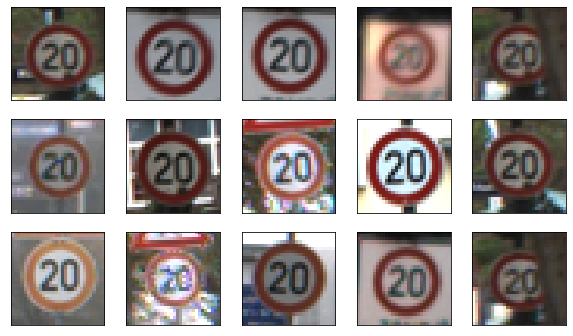

In [4]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(X[i])
    
plt.show()

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Shape of x_train: ", x_train.shape, " and y_train:",y_train.shape)
print("Shape of x_test: ", x_test.shape, " and y_test:",y_test.shape)
#one hot encoding the labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

Shape of x_train:  (31367, 30, 30, 3)  and y_train: (31367,)
Shape of x_test:  (7842, 30, 30, 3)  and y_test: (7842,)


In [77]:
# Model CNN Architecture
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training Process

In [78]:
epochs = 15
history = model.fit(x_train, y_train, batch_size=64, epochs=epochs,validation_data=(x_test, y_test))
model.save('traffic_recognition.h5')

Epoch 1/15
491/491 [==============================] - 53s 107ms/step - loss: 4.3351 - accuracy: 0.2262 - val_loss: 0.5850 - val_accuracy: 0.8513
Epoch 2/15
491/491 [==============================] - 53s 108ms/step - loss: 0.7992 - accuracy: 0.7697 - val_loss: 0.1766 - val_accuracy: 0.9486
Epoch 3/15
491/491 [==============================] - 54s 110ms/step - loss: 0.3803 - accuracy: 0.8911 - val_loss: 0.1141 - val_accuracy: 0.9732
Epoch 4/15
491/491 [==============================] - 53s 107ms/step - loss: 0.2897 - accuracy: 0.9173 - val_loss: 0.0786 - val_accuracy: 0.9782
Epoch 5/15
491/491 [==============================] - 53s 108ms/step - loss: 0.2208 - accuracy: 0.9382 - val_loss: 0.0655 - val_accuracy: 0.9828
Epoch 6/15
491/491 [==============================] - 53s 107ms/step - loss: 0.1962 - accuracy: 0.9435 - val_loss: 0.0434 - val_accuracy: 0.9866
Epoch 7/15
491/491 [==============================] - 53s 108ms/step - loss: 0.1673 - accuracy: 0.9534 - val_loss: 0.0622 - val_ac

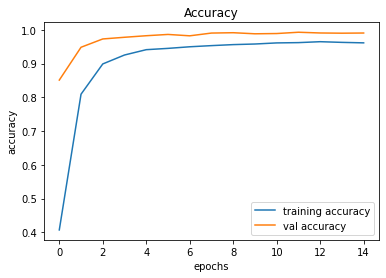

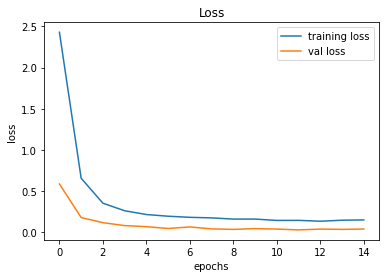

In [81]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [83]:
#Testing the model
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')
labels = y_test['ClassId'].values
img_paths = y_test['Path'].values
test_data=[]
for path in img_paths:
  image = Image.open(path)
  image = image.resize((30,30))
  test_data.append(np.array(image))
test_data = np.array(test_data)
pred = model.predict_classes(test_data)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(labels, pred)

0.9582739509105305

In [85]:
test_data

array([[[[116, 140, 175],
         [116, 138, 171],
         [119, 138, 173],
         ...,
         [102, 119, 150],
         [101, 122, 149],
         [ 93, 112, 139]],

        [[116, 142, 177],
         [116, 141, 175],
         [117, 141, 174],
         ...,
         [120, 143, 178],
         [122, 144, 176],
         [122, 142, 174]],

        [[118, 142, 174],
         [116, 141, 175],
         [114, 140, 172],
         ...,
         [121, 144, 181],
         [122, 144, 180],
         [119, 142, 178]],

        ...,

        [[117, 137, 168],
         [115, 135, 165],
         [116, 135, 164],
         ...,
         [116, 138, 170],
         [116, 136, 168],
         [118, 139, 171]],

        [[116, 136, 166],
         [115, 134, 167],
         [115, 133, 165],
         ...,
         [114, 135, 168],
         [116, 136, 166],
         [115, 139, 167]],

        [[112, 135, 166],
         [111, 134, 165],
         [119, 135, 166],
         ...,
         [115, 137, 166],
        

In [86]:
pred

array([16,  1, 38, ..., 32,  7, 10])

In [104]:
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_recognition.h5')
#dictionary to label all traffic signs class
classes = { 1:'Speed limit (20km/h)',
    2:'Speed limit (30km/h)',
    3:'Speed limit (50km/h)',
    4:'Speed limit (60km/h)',
    5:'Speed limit (70km/h)',
    6:'Speed limit (80km/h)',
    7:'End of speed limit (80km/h)',
    8:'Speed limit (100km/h)',
    9:'Speed limit (120km/h)',
    10:'No passing',
    11:'No passing veh over 3.5 tons',
    12:'Right-of-way at intersection',
    13:'Priority road',
    14:'Yield',
    15:'Stop',
    16:'No vehicles',
    17:'Veh > 3.5 tons prohibited',
    18:'No entry',
    19:'General caution',
    20:'Dangerous curve left',
    21:'Dangerous curve right',
    22:'Double curve',
    23:'Bumpy road',
    24:'Slippery road',
    25:'Road narrows on the right',
    26:'Road work',
    27:'Traffic signals',
    28:'Pedestrians',
    29:'Children crossing',
    30:'Bicycles crossing',
    31:'Beware of ice/snow',
    32:'Wild animals crossing',
    33:'End speed + passing limits',
    34:'Turn right ahead',
    35:'Turn left ahead',
    36:'Ahead only',
    37:'Go straight or right',
    38:'Go straight or left',
    39:'Keep right',
    40:'Keep left',
    41:'Roundabout mandatory',
    42:'End of no passing',
    43:'End no passing veh > 3.5 tons' }
def classify(file_path):
  image = Image.open(file_path)
  image = image.resize((30,30))
  image = np.expand_dims(image, axis=0)
  image = np.array(image)
  pred = model.predict_classes([image])[0]
  #sign = classes[pred+1]
  print(classes[pred])
  #result.configure(text=sign)

In [105]:
classify("/home/shyam/Documents/Test/00000.png")

No vehicles


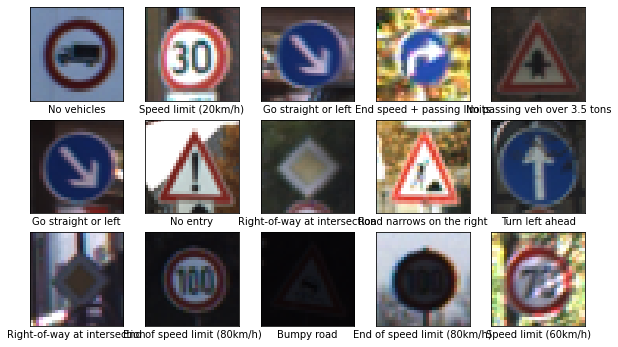

In [112]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(test_data[i])
    plt.xlabel(classes[pred[i]])
plt.show()